# 第四章 卷积神经网络

## 卷积神经网络基础


- **卷积层（Convolution Layer）**

  卷积层的作用是提取输入数据的特征，而完成该功能的是卷积层中的卷积核，我们可以把卷积核看成为指定窗口大小的扫描器，下面通过一个实例说明。
  
  假设有一张大小为32*32*3的图像（32*32指的是图像的高度*宽度，3指的是图像是三个色彩通道），我们定义一个窗口大小为5*5*3的卷积核（同理5*5表示卷积核的高度*宽度，3表示卷积核的深度，这个深度和图像的色彩通道保持一致，目的是让卷积核能同时在三个色彩通道上进行卷积操作。）如图4-1表示的是单色彩通道的输入图像的卷积过程。
  
  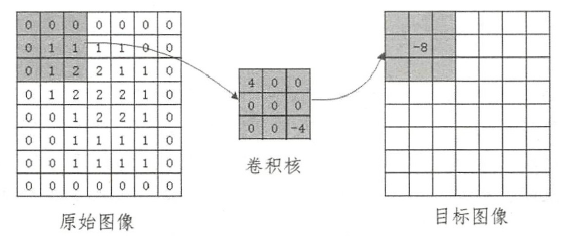
  
  $$图4-1 单色彩通道图像卷积$$
  
  其计算方法是将图上对应位置的数据相乘然后相加。接下来我们定义步长控制窗口的移动，步长就是卷积核每次移动经过图上像素的点数。如图4-2就是步长为2的卷积核经过一次滑动后位置的变化情况。**卷积操作后的输出特征图深度为1**
  
  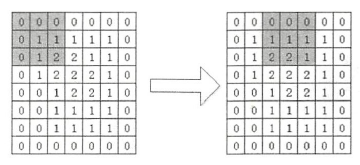
  
  $$图4-2$$
  
  周围全是0的那一圈是一种用于提升卷积效果的边界像素填充方式，在进行卷积之前，我们可以用两种方式对图像进行填充，分别是Same和Valid，Valid就是对图像不做任何处理，这样做可能使得图像中的部分像素点不能被窗口捕捉。Same是在图像的外围填充指定层数的值全为0的像素边界。
  
  
  **卷积通用公式**
  
  用于计算输出图像的宽度和高度，其计算公式为：
  
  $$\eqalign{
  & {W_{output}} = \frac{{{W_{input}} - {W_{filter}} + 2P}}{S} + 1  \cr 
  & {H_{output}} = \frac{{{H_{input}} - {H_{filter}} + 2P}}{S} + 1 \cr} $$
  
  下标filter表示卷积核的相关操作，S表示步长，P（Padding）表示图像边缘增加的像素层数，如果选择的是Valid模式，那么P=0。
  
  
  **三色彩通道图像卷积过程**
  
  三色彩通道图像的卷积操作示意图如图4-3所示。
  
  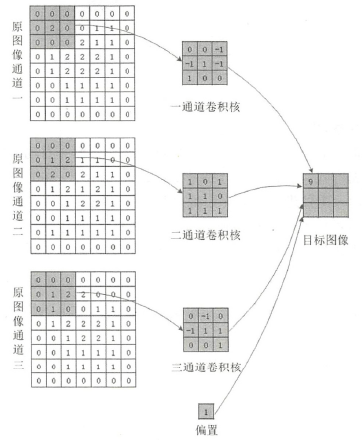
  
  $$图4-3$$
  
  卷积的过程中我们还加入了值为1的偏置。
  
  
- **池化层**

  池化层的作用是用来提取输入数据核心特征的方法。常用的池化层有平均池化和最大池化层。池化层处理的数据是经过卷积操作后的数据，如图4-4就是最大池化层的操作过程。**池化操作后输出特征图的深度与滑动窗口深度保持一致。**
  
  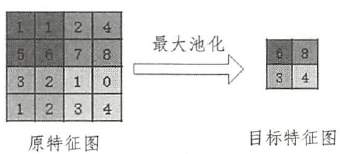
  
  $$图4-4 最大池化层$$
  
  下图是平均池化层处理数据的示意图。
  
  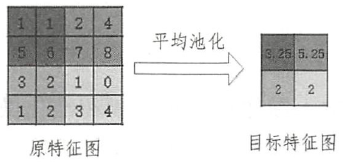
  
  $$图4-5 平均池化层$$
  
  池化通用公式用于计算经过池化操作后输出特征图的宽度和高度，其数学表达式为：
  
  $$\eqalign{
  & {W_{output}} = \frac{{{W_{input}} - {W_{filter}}}}{S} + 1  \cr 
  & {H_{output}} = \frac{{{H_{input}} - {H_{filter}}}}{S} + 1 \cr} $$
  
  
- **全连接层**

  全连接层的作用是对经过卷积和池化操作提取的特征进行压缩，并根据压缩的特征完成模型的分类功能。如图4-6所示是一个全连接层的简化流程。
  
  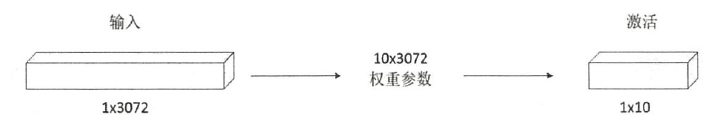
  
  $$图4-6 全连接层工作流程$$
  
  左边是经过卷积和池化处理提取的特征，乘上全连接层定义的权重参数，压缩成仅有的10个分类结果，在经过激活函数的进一步处理，使得分类预测结果更加明显。
  
## LeNet模型

   如图是LeNet-5卷积神经网络的网络架构图。
   
   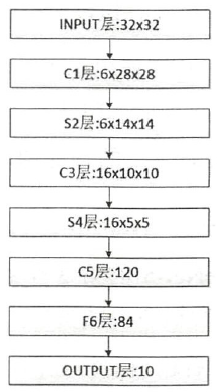
   
   $$图4-7 LeNet卷积神经网络$$
   
- **INPUT层**

  LeNet要求输入的图像必须是32X32X1的，即宽度高度都是32的单通道图像。
  
  
- **C1层**

  C1层是第一个卷积层，使用的卷积核移动窗口为5X5X1，步长为1，输出数据的高度和宽度都为28，但是C1要求输出的数据深度为6层，所以需要进行6次同样的卷积操作，最终得到的特征图的维度为28X28X6。
  
  
- **S2层**

  下采样层，功能是要完成缩减输入的特征图的大小，我们使用最大池化层来进行下采样，根据S2层的要求，输出特征图应为14X14X6，很容易求得最大池化层的滑动窗口为2X2X6，步长为2。
  
  
- **C3层**

  第二个卷积层，由图可知，C3层要求输出的特征图为10X10X16的，所以求得第二个卷积层的滑动窗口为5X5X6的，步长为1，但需要的深度为16层，所以必须要进行16次同样的卷积操作。
  
  
- **S4层**

  S4是第二个下采样层，依然采用最大池化层，由图可知S4层要求输出的特征图为5X5X16，计算可得滑动窗口为2X2X16，步长为2。
  
  
- **C5层**

  这是第三个卷积层，要求输出的特征图为1X1X120，选择Padding = 0 ，同理可以算的滑动窗口大小为：5X5X16，步长为1，需要重复卷积120次。
  
  
- **F6层**

  F6层是LeNet第一个全连接层，由图可得要求输出的深度为84层，也就是1X84的矩阵，从C5层的输入为1X120的矩阵，所以全连接层的权重参数应该为120X84的矩阵。
  
  
- **OUTPUT层**

  这层是输出层，要求的深度是10层，如果LeNet-5是用来解决分类问题，比如识别手写字体的类别，输出的结果就是输入图像对应的10种类别的可能性值。因为需要将1X84数据压缩成1X10，所以需要一个84X10的矩阵来完成。将最终得到的10个数据全部输入到Softmax激活函数中，就可以得到模型预测的输入图像对应的10种类别的可能性值了。
  
## AlexNet模型

  如图4-8是AlexNet网络结构图。
  
  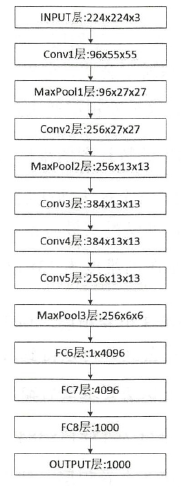
  
  $$图4-8$$
  
  AlexNet比LeNet神经网络层次更深，但卷积层、池化层、全连接层跟LeNet实现很类似，所以就不一一介绍了。这里只求解每一层的滑动窗口。
  
  
- **INPUT：**输入一张维度224X224X3的图像，3表示三色彩通道。


- **Conv1层**：Padding为2，滑动窗口为11X11X3，步长为4，卷积96次。


- **MaxPool1层**：滑动窗口为3X3X96，步长为2。


- **Conv2层**：Padding为2，滑动窗口为5X5X96,步长为1，卷积256次。


- **MaxPool2层**：滑动窗口为3X3X256，步长为2。


- **Conv3层**：Padding为1，滑动窗口为3X3X256，步长为1，卷积384次。


- **Conv4层**：Padding为1，滑动窗口为3X3X384，步长为1，卷积次数为384次。


- **Conv5层**：Padding为1，滑动窗口为3X3X384，步长为1，卷积次数为256次。


- **MaxPool3层**：滑动窗口为3X3X256，步长为2。


- **FC6层**：因为输入的特征图是6X6X256的，所以要对其进行扁平化处理，将其变为维度为1X9216的特征图，所以需要一个9216X4096的矩阵完成输入数据和输出数据的全连接。


- **FC7层**：需要一个4096X4096的矩阵完成数据的全连接。


- **FC8层**：需要一个4096X1000的矩阵完成数据的全连接。


- **OUTPUT层**：将维度为1X1000的数据传递到Softmax激活函数中，就能输出1000个全新的输出值，这些输出值就是模型预测的输入图像对应的1000个类别的可能性值。

## VGGNet模型

  于2014年提出，主要应用于定位任务和分类任务中，相对于AlexNet而言，VGGNet模型中统一了卷积中使用的参数，卷积核滑动窗口统一为3X3，步长为1，Padding为1。而且增加了深度，分别定义了16层的VGGNet-16和19层的VGGNet-19。这两个改变对人们重新定义卷积神经网络架构有很重要的意义，至少证明了增加神经网络深度和使用更小的卷积核可以更有效的提升模型的性能。如图4-9所示，是一个16层的VGGNet网络结构图。
  
  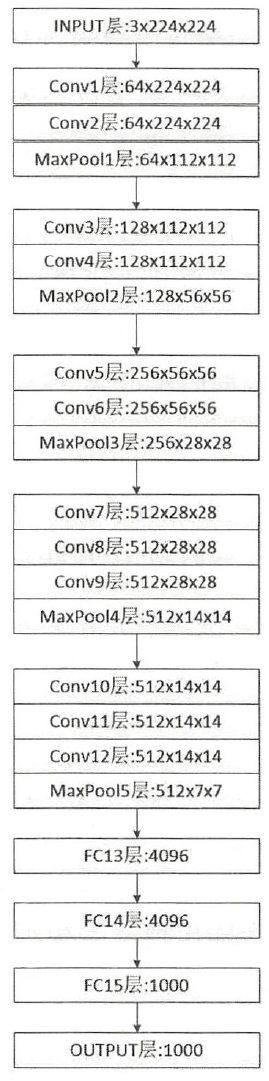
  
  $$图4-9$$
  
  VGGNet的卷积核滑动窗口都是3X3的，步长和Padding都是1，池化层的滑动窗口维度都是2X2的，步长都是。FC13层作为VGGNet的第一个全连接层，其输入特征图维度是7X7X512，所以需要扁平化处理。其余层的特征可以从图中推断出来。
  
## GoogleNet模型

  在2014年的比赛中得了分类任务第一名，VGGNet得第二。GoogleNet神经网络深22层，网络架构中引入了Inception单元，这两个改变证明，通过使用Inception单元能够进一步提升模型性能。图4-10为GoogleNet网络结构图。
  
  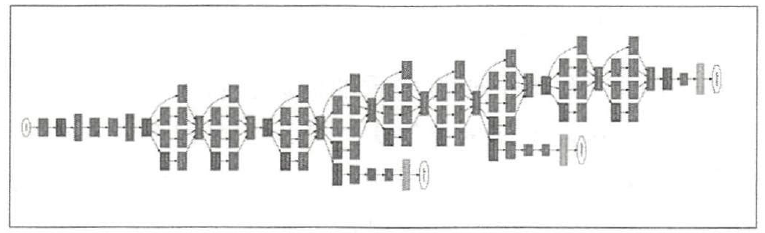
  
  $$图4-10$$
  
  
- **Naive Inception单元**

  如图4-11为Naive Inception单元结构图。
  
  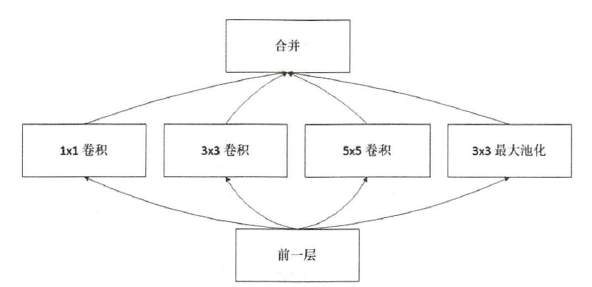
  
  $$图4-11$$
  
  前一层（Previous Layer）是Naive Inception的数据输入层，输入一张32X32X256的特征图，然后此特征图被复制成4份，分别传至上面的卷积层和最大池化层，假设从左至右的窗口步长均为1，其余特性依次为：
  
  Padding = 0，窗口维度为1X1X256，要求输出特征图的深度为128；
  
  Padding = 1，3X3X256，要求深度192
  
  Padding = 2，5X5X256，输出深度96
  
  Padding = 1，3X3X256
  
  通过计算，最后分别得到的特征图为32 × 32 × 128 、32 × 32 × 192 、32x32 × 96 和32x32x256，最后在合并层合并，得到32 × 32 × 672的特征图。Naive Inception有两个缺点，第一，卷积层直接和前一层数据对接，计算量很大；第二，池化操作后特征图的深度保持不变，这增加了这单元之后的网络层计算量，所以GoogleNet中的Inception对此进行了改进。如图4-12为GoogleNet中使用的Inception架构图。
  
  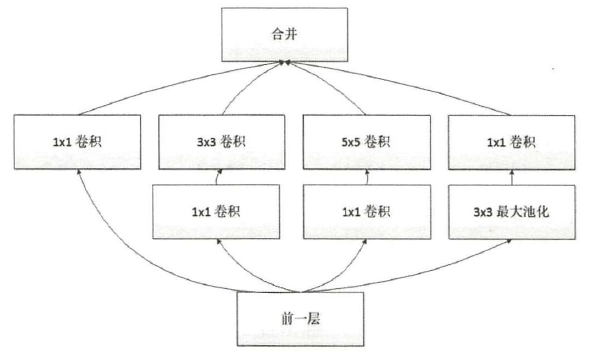
  
  $$图4-12$$
  
  1X1的卷积层的作用是聚合或发散。和我想的一样，减少了计算量。
  
  
- **GoogleNet模型**

  把GoogleNet模型看做三大块组成，分别是模型的起始部分、Inception单元堆叠部分和模型的分类输出部分。如图4-13是GoogleNet模型的**起始部分结构**。
  
  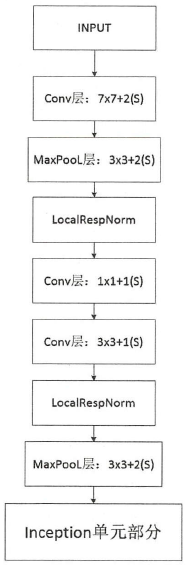
  
  $$图4-13$$
  
  每一层都有标注滑动窗口的维度，其中S表示步长，是Stride的缩写。LocalRespNorm表示的是Local Response Normalization（局部响应归一化层），整个起始部分的输出作为Inception堆叠部分的输入。
  
  **GoogleNet分类输出部分**如图4-14.
  
  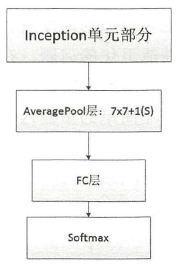
  
  $$图4-14$$
  
  总而言之，GoogleNet模型中使用了Inception单元，使模型的搭建实现了模块化，如果需要增加或减少模型的深度只需要添加或减少相应的Inception单元就行。有一句话看不懂，**为了避免GoogleNet模型深层次的梯度消失，模型中加入了两个额外的辅助Softmax激活函数，用于向前传导梯度。**
  

## ResNet（残差网络模型Residual Network）

  通过使用参数网络结构，深层次的卷积神经网络取得了更好的性能。如图4-15是具有34层网络结构的ResNet模型。
  
  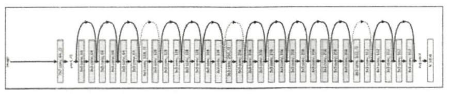
  
  $$图4-15$$
  
  ResNet模型中大部分都是残差结构，所以同样具备了模块化性质。如果在搭建模型的时候，只是一味的对模型深度进行机械的累加，则最后得到的模型会出现梯度消失、极易过拟合等模型性能退化的问题。而ResNet中大量使用相同的模块来搭建深度更深的网络，最后得到的模型却有不俗的表现，其中一个重要的原因就是模型累加的模块并非简单的单输入单输出结构，而是设置了附加关系的新结构，这个附加关系就是恒等映射（Identity Mapping）。这个结构就是残差网络结构。结构图如图4-16所示。
  
  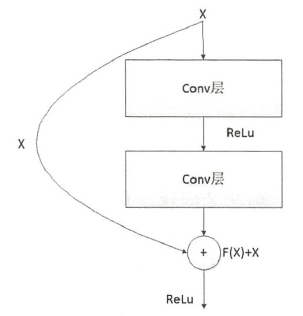
  
  $$图4-16 残差网络结构$$
  
  可以看到残差模块的输出结果等于输入数据X经过两次卷积之后的输出F(x)加上输入X的恒等映射。这个简单的加法并不会增加模型的参数和计算量，却能加快训练速度，而且在搭建ResNet模型的深度加深时，使用残差模块的网络结构不仅不会出现模型退化问题，性能反而提升了。
  
  需要注意的是，如果残差模块的输入和输出数据的维度若一致可直接相加；若维度不一致，则先需要进行线性映射，在得到维度一致后再相加或者对维度不一致的部分填充0。
  
  有人还提出了能让网络结构更深的残差模块，如图4-17。
  
  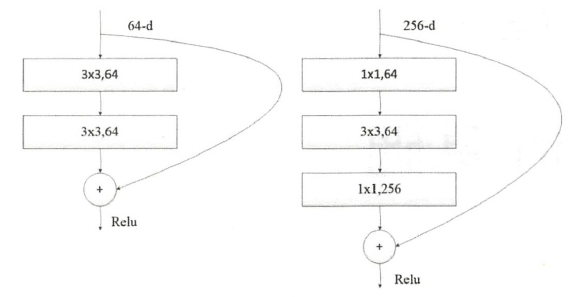
  
  $$图4-17$$
  
  在之前的残差网络中引入了NIN（至于什么是NIN我还搞不清楚），使用1X1卷积层减少模型训练的参数和计算量，是拓展更深变得有可能。后来提出了50层、101、152层的ResNet模型，而且错误率和计算复杂度都保持在很低的程度，性能还有所提升。